# Particle Swarm Optimization

### 1 visualization

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface
import scipy

np.random.seed(1)

origin = np.random.random((10, 2)) # origin point
target = [2, 2]

In [67]:
def test_loss(b, x):
    """PSO test function.
    
    Parameters
    ----------
    b : numpy.ndarray
        sets of inputs shape :code:'(n_particles, 2)'
    
    x : numpy.ndarray
        target point of shape :code:'(2, )
        
    Returns
    ----------
    numpy.ndarray
        computed cost of size :code:`(n_particles, )`
    """
    
    dist = ((b - x) ** 2).sum(axis=1)
    
    return dist

In [114]:
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=len(origin), dimensions=2, options=options, init_pos=origin)
# Perform optimization
best_cost, best_pos = optimizer.optimize(test_loss, iters=35, x=target)

2021-02-20 10:34:25,981 - pyswarms.single.global_best - INFO - Optimize for 35 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|35/35, best_cost=0.000179
2021-02-20 10:34:26,122 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.00017865660981871199, best pos: [2.00273024 1.98691557]


In [115]:
V = np.array(optimizer.velocity_history)
X = np.array(optimizer.pos_history)

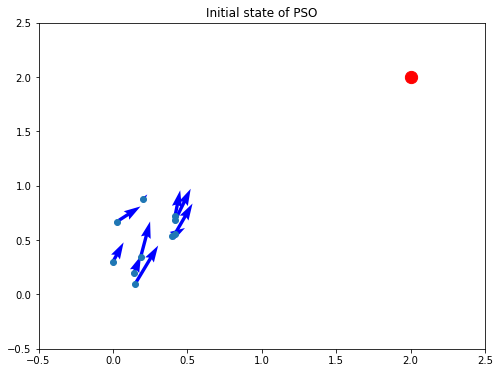

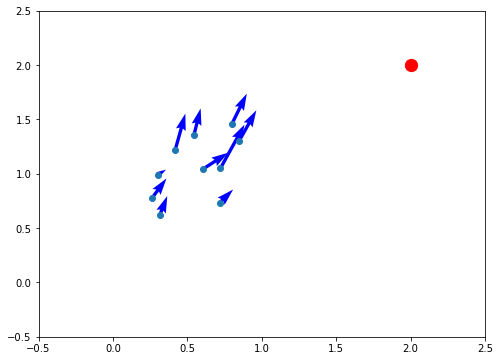

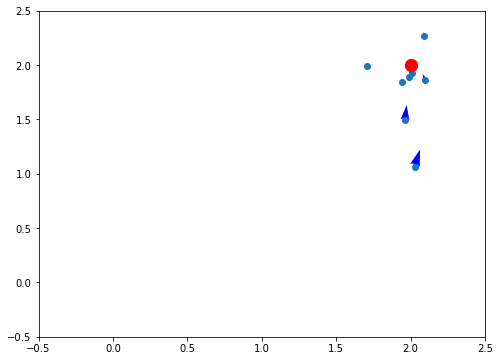

In [120]:
plt.figure(1, figsize=(8,6))

plt.quiver(*X[0, :].T, V[1,:,0], V[1,:,1], color='blue', scale=11)
plt.scatter(X[0, :, 0], X[0, :, 1])
plt.scatter(x=2, y=2, s=150, c='red')
plt.ylim(-0.5, 2.5)
plt.xlim(-0.5, 2.5)
plt.title("Initial state of PSO")

plt.figure(2, figsize=(8,6))

plt.quiver(*X[1, :].T, V[2,:,0], V[2,:,1], color='blue', scale=10)
plt.scatter(X[1, :, 0], X[1, :, 1])
plt.scatter(x=2, y=2, s=150, c='red')
plt.ylim(-0.5, 2.5)
plt.xlim(-0.5, 2.5)

plt.figure(3, figsize=(8,6))
plt.quiver(*X[30, :].T, V[31,:,0], V[31,:,1], color='blue', scale=10)
plt.scatter(X[30, :, 0], X[30, :, 1])
plt.scatter(x=2, y=2, s=150, c='red')
plt.ylim(-0.5, 2.5)
plt.xlim(-0.5, 2.5)

plt.show()